In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import dill
import scipy

In [2]:
df0 = pd.read_csv('mybl_ticker.csv').dropna()
df0['wtigold'] = df0['wti']/df0['gold']
df0_columns = df0.columns
df0.tail(2)

,date_added,gspc,vix,tnx,ixic,rut,wti,gold,wtigold
5007,2021-01-14,3809.84,22.21,1.088,13128.95,2111.97,52.78,1838.9,0.028702
5008,2021-01-15,3795.54,23.25,1.129,13112.60,2155.35,53.63,1851.2,0.028970


In [3]:
df1 = df0.iloc[:4000]
df_test1 = df0.iloc[4000:]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class Correlation_df:
    def __init__(self, data):
        self.data_tr = self.data_tr(data)
        
    def data_tr(self, data):
        list_win_corr = [5, 15, 50, 100]
        win_predict = 10
        set_corr = set()
        for k in list_win_corr:
            for i in ('gspc', 'vix', 'tnx', 'ixic', 'rut', 'wti', 'gold', 'wtigold'):
                for j in ('gspc', 'vix', 'tnx', 'ixic', 'rut', 'wti', 'gold', 'wtigold'):
                    if i != j and f'{j}{i}{k}' not in set_corr:
                        data[f'{i}{j}{k}'] = data[i].rolling(window=k).corr(data[j])
                        set_corr.add(f'{i}{j}{k}')

        for i in range(0, len(data) - win_predict):
            if data.vix.iloc[i - 1: i + win_predict].max() < 30:
                data.at[i, 'vix_pr'] = 0
            else:
                data.at[i, 'vix_pr'] = 1
        
        return data#.iloc[max(list_win_corr) - 1: -win_predict]

df = Correlation_df(df1).data_tr

d:\temp\python\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


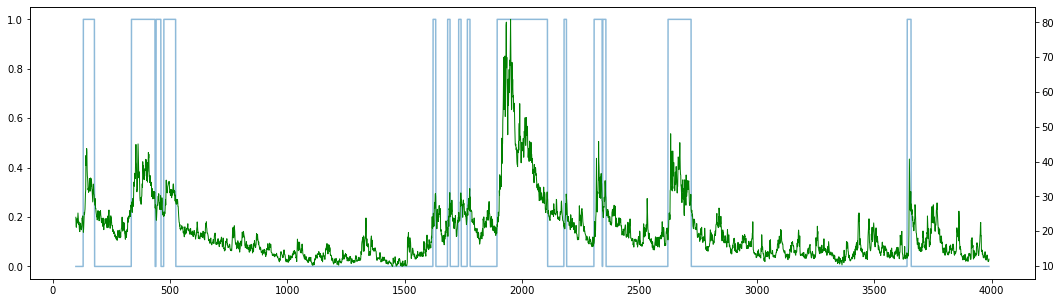

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
lns1 = ax.plot(df.vix_pr, alpha=0.5)
ax2 = ax.twinx()
lns2 = ax2.plot(df.vix, linewidth=1, c='g', label='y')
plt.show()

In [5]:
df.vix_pr.value_counts(normalize=True)

0.0    0.830892
1.0    0.169108
Name: vix_pr, dtype: float64

In [9]:
df.head(20)

,date_added,gspc,vix,tnx,ixic,rut,wti,gold,wtigold,gspcvix5,...,ixicwti100,ixicgold100,ixicwtigold100,rutwti100,rutgold100,rutwtigold100,wtigold100,wtiwtigold100,goldwtigold100,vix_pr
0,2001-02-16,1301.530029,22.120001,5.093,2425.379883,499.279999,29.160000,258.200012,0.112936,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2001-02-20,1278.939941,24.690001,5.097,2318.350098,491.140015,28.580000,256.100006,0.111597,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2001-02-21,1255.270020,25.750000,5.129,2268.939941,483.510010,28.549999,258.200012,0.110573,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2001-02-22,1252.819946,26.760000,5.154,2244.959961,477.260010,28.820000,258.500000,0.111489,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2001-02-23,1245.859985,27.209999,5.080,2262.510010,477.450012,29.000000,260.899994,0.111154,-0.981738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2001-02-26,1267.650024,25.430000,5.036,2308.500000,488.309998,28.440001,265.799988,0.106998,-0.944846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,2001-02-27,1257.939941,26.490000,4.956,2207.820068,478.750000,28.120001,267.399994,0.105161,-0.863287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2001-02-28,1239.939941,28.350000,4.908,2151.830078,474.369995,27.420000,266.799988,0.102774,-0.978909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2001-03-01,1241.229980,28.080000,4.856,2183.370117,473.299988,27.650000,265.200012,0.104261,-0.983770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2001-03-02,1234.180054,27.430000,4.943,2117.629883,476.880005,27.840000,262.100006,0.106219,-0.893088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


122
gspc
NormaltestResult(statistic=357.08486316482754, pvalue=2.884079171786912e-78)
SkewtestResult(statistic=16.730027501218608, pvalue=7.920171276202364e-63)
KurtosistestResult(statistic=-8.785843327381647, pvalue=1.5519578020856567e-18)


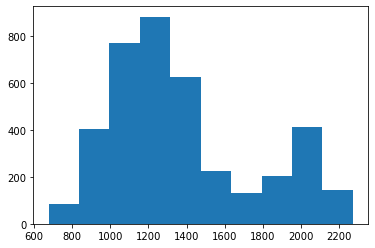

vix
NormaltestResult(statistic=1831.1604416653927, pvalue=0.0)
SkewtestResult(statistic=35.774286300100044, pvalue=2.773875160658186e-280)
KurtosistestResult(statistic=23.481074962272633, pvalue=6.367131038296905e-122)


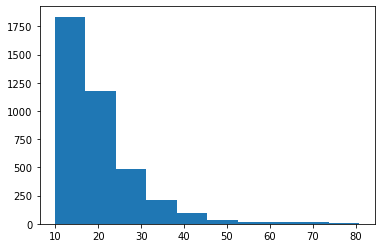

tnx
NormaltestResult(statistic=15954.395110277917, pvalue=0.0)
SkewtestResult(statistic=-2.7090752486391447, pvalue=0.00674710352223023)
KurtosistestResult(statistic=-126.28165354308253, pvalue=0.0)


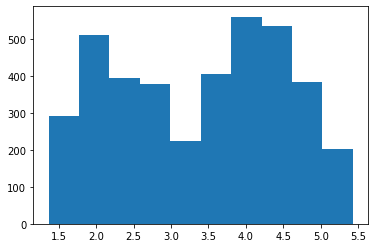

ixic
NormaltestResult(statistic=439.83874802018164, pvalue=3.091928225038569e-96)
SkewtestResult(statistic=20.422365257209485, pvalue=1.0581496398270373e-92)
KurtosistestResult(statistic=-4.771346279752144, pvalue=1.8299861546996954e-06)


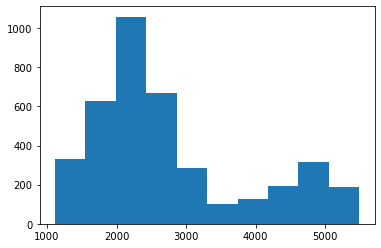

rut
NormaltestResult(statistic=402.91691777671423, pvalue=3.218866552046571e-88)
SkewtestResult(statistic=11.845478862019267, pvalue=2.2711732503861392e-32)
KurtosistestResult(statistic=-16.20498529176034, pvalue=4.649983128393384e-59)


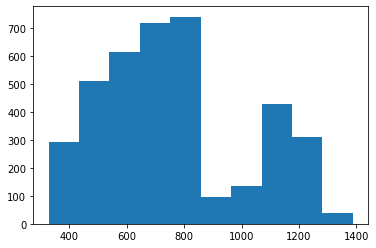

wti
NormaltestResult(statistic=731.620159892962, pvalue=1.3511415659993314e-159)
SkewtestResult(statistic=4.097355824017263, pvalue=4.1789628362207694e-05)
KurtosistestResult(statistic=-26.73633922481449, pvalue=1.780212864928436e-157)


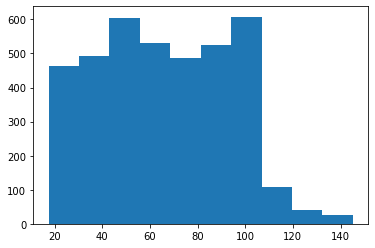

gold
NormaltestResult(statistic=6536.345000907604, pvalue=0.0)
SkewtestResult(statistic=2.6103355071499283, pvalue=0.009045346149781709)
KurtosistestResult(statistic=-80.80551435049291, pvalue=0.0)


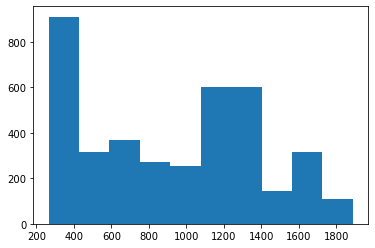

wtigold
NormaltestResult(statistic=142.13541331841282, pvalue=1.366743938225757e-31)
SkewtestResult(statistic=9.037625318190027, pvalue=1.6011210675963394e-19)
KurtosistestResult(statistic=-7.775393361523481, pvalue=7.521331655868881e-15)


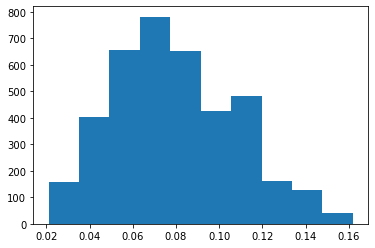

gspcvix5
NormaltestResult(statistic=1831.1898637642498, pvalue=0.0)
SkewtestResult(statistic=36.953068799489586, pvalue=6.502098201841497e-299)
KurtosistestResult(statistic=21.579169818703384, pvalue=2.818834851555945e-103)


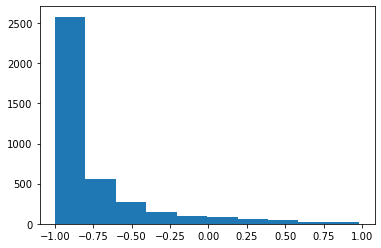

gspctnx5
NormaltestResult(statistic=709.1506447483982, pvalue=1.0230434374146078e-154)
SkewtestResult(statistic=-15.087887295314868, pvalue=1.94573350022712e-51)
KurtosistestResult(statistic=-21.94325184908277, pvalue=1.0045622225969043e-106)


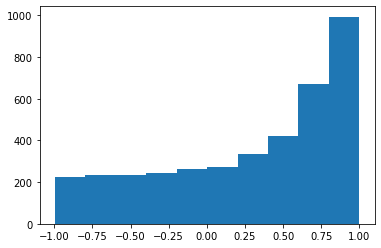

gspcixic5
NormaltestResult(statistic=3397.762967024333, pvalue=0.0)
SkewtestResult(statistic=-48.787350903090896, pvalue=0.0)
KurtosistestResult(statistic=31.89917489345154, pvalue=2.7413334339281998e-223)


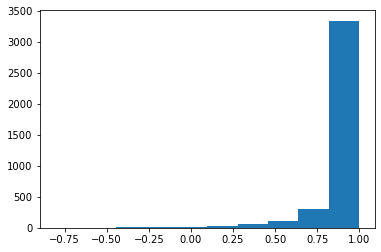

gspcrut5
NormaltestResult(statistic=3005.389992473009, pvalue=0.0)
SkewtestResult(statistic=-45.91485749312774, pvalue=0.0)
KurtosistestResult(statistic=29.95356162226423, pvalue=3.954227781793903e-197)


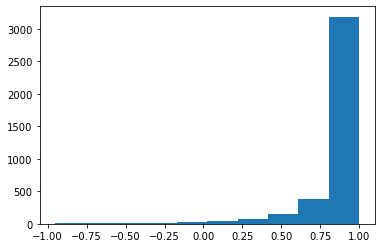

gspcwti5
NormaltestResult(statistic=1971.290838773226, pvalue=0.0)
SkewtestResult(statistic=-10.611888107424138, pvalue=2.623923048904913e-26)
KurtosistestResult(statistic=-43.11239577625832, pvalue=0.0)


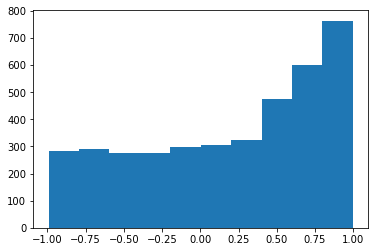

gspcgold5
NormaltestResult(statistic=57585.29848565914, pvalue=0.0)
SkewtestResult(statistic=0.10401527778106383, pvalue=0.9171572244203609)
KurtosistestResult(statistic=239.96934734770008, pvalue=0.0)


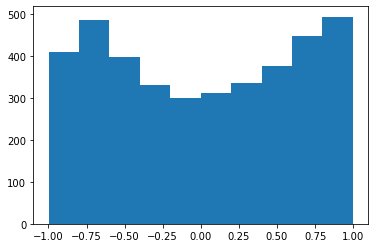

gspcwtigold5
NormaltestResult(statistic=2769.911982358766, pvalue=0.0)
SkewtestResult(statistic=-9.155280948315395, pvalue=5.421654808188804e-20)
KurtosistestResult(statistic=-51.82752949076561, pvalue=0.0)


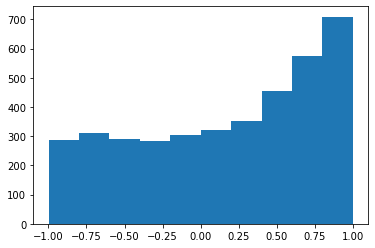

vixtnx5
NormaltestResult(statistic=1078.3129721458142, pvalue=7.035795634033841e-235)
SkewtestResult(statistic=12.702813967275082, pvalue=5.704116690339342e-37)
KurtosistestResult(statistic=-30.281206869254984, pvalue=2.0267888885675278e-201)


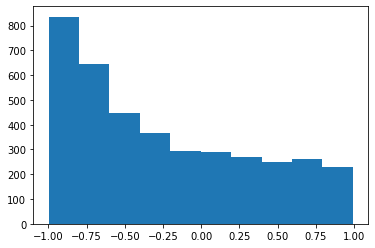

vixixic5
NormaltestResult(statistic=1382.3717151935855, pvalue=6.634314816576877e-301)
SkewtestResult(statistic=32.9483468313615, pvalue=4.4674652477617074e-238)
KurtosistestResult(statistic=17.22725039795661, pvalue=1.6584983683570114e-66)


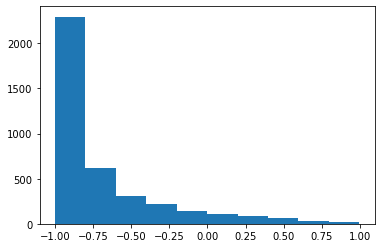

vixrut5
NormaltestResult(statistic=1406.038464497829, pvalue=4.8153378419460124e-306)
SkewtestResult(statistic=33.09813195474783, pvalue=3.1615863523698703e-240)
KurtosistestResult(statistic=17.622489199994693, pvalue=1.6555724303589053e-69)


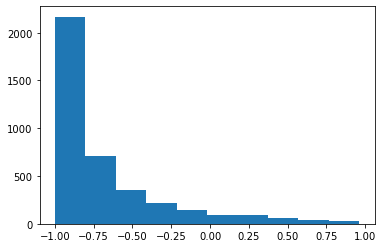

vixwti5
NormaltestResult(statistic=2443.9600735940676, pvalue=0.0)
SkewtestResult(statistic=8.774071151037491, pvalue=1.723202563178203e-18)
KurtosistestResult(statistic=-48.65157499023643, pvalue=0.0)


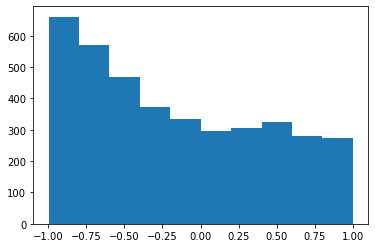

vixgold5
NormaltestResult(statistic=26758.01596750808, pvalue=0.0)
SkewtestResult(statistic=0.11711265546150225, pvalue=0.9067707811414166)
KurtosistestResult(statistic=-163.57873410726106, pvalue=0.0)


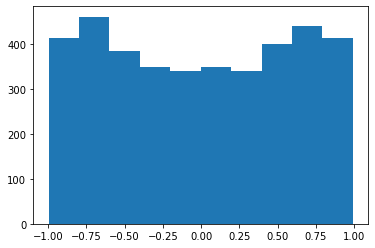

vixwtigold5
NormaltestResult(statistic=2549.8255545238458, pvalue=0.0)
SkewtestResult(statistic=7.959443106492479, pvalue=1.728153097184229e-15)
KurtosistestResult(statistic=-49.86454471825001, pvalue=0.0)


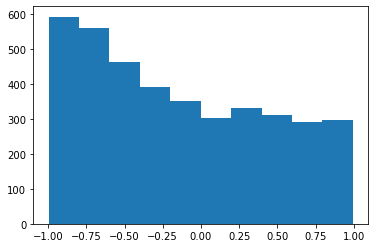

tnxixic5
NormaltestResult(statistic=656.754583062031, pvalue=2.440924270912622e-143)
SkewtestResult(statistic=-15.094188821001422, pvalue=1.7684942611243394e-51)
KurtosistestResult(statistic=-20.71038500120137, pvalue=2.792160770660814e-95)


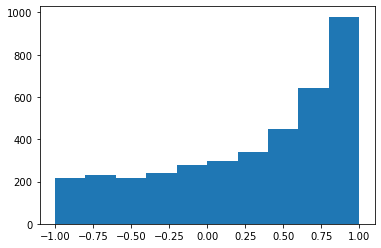

tnxrut5
NormaltestResult(statistic=772.8410866829989, pvalue=1.5124824106005279e-168)
SkewtestResult(statistic=-14.273584374212588, pvalue=3.1971423235285965e-46)
KurtosistestResult(statistic=-23.85594005264167, pvalue=8.786440952304513e-126)


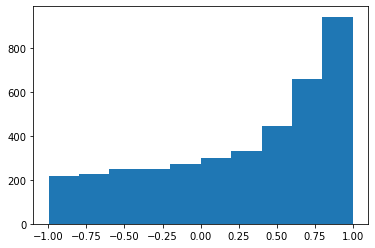

tnxwti5
NormaltestResult(statistic=3777.3511800522856, pvalue=0.0)
SkewtestResult(statistic=-7.2343538030406505, pvalue=4.677509096860682e-13)
KurtosistestResult(statistic=-61.03290346284303, pvalue=0.0)


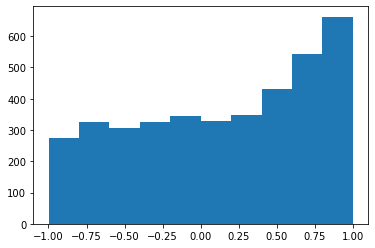

tnxgold5
NormaltestResult(statistic=4608.019485449408, pvalue=0.0)
SkewtestResult(statistic=7.124311968072434, pvalue=1.0460188050335808e-12)
KurtosistestResult(statistic=-67.50750820783558, pvalue=0.0)


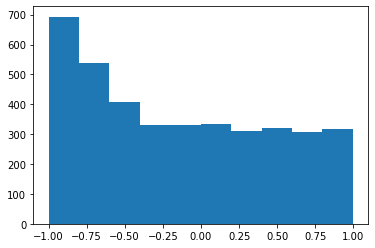

tnxwtigold5
NormaltestResult(statistic=1639.343573213269, pvalue=0.0)
SkewtestResult(statistic=-10.369388897449767, pvalue=3.417029211155025e-25)
KurtosistestResult(statistic=-39.138463780617585, pvalue=0.0)


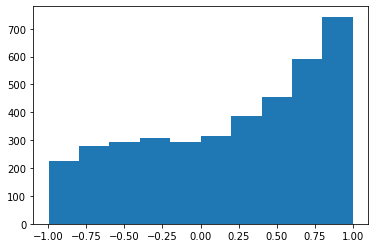

ixicrut5
NormaltestResult(statistic=3295.2472837648324, pvalue=0.0)
SkewtestResult(statistic=-48.11907620709946, pvalue=0.0)
KurtosistestResult(statistic=31.30178571168404, pvalue=4.412388267388248e-215)


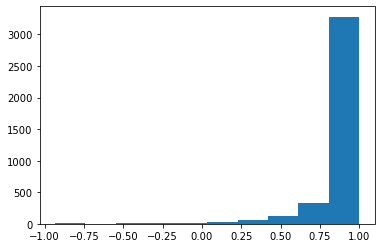

ixicwti5
NormaltestResult(statistic=4562.046188055038, pvalue=0.0)
SkewtestResult(statistic=-8.256426724262791, pvalue=1.5009830534290992e-16)
KurtosistestResult(statistic=-67.03639016088141, pvalue=0.0)


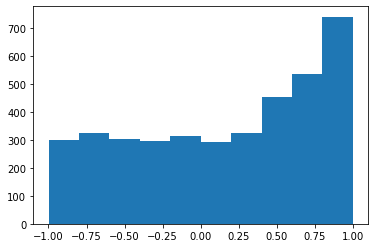

ixicgold5
NormaltestResult(statistic=65526.5015947104, pvalue=0.0)
SkewtestResult(statistic=0.3017474918591879, pvalue=0.7628445614301378)
KurtosistestResult(statistic=-255.98126990692415, pvalue=0.0)


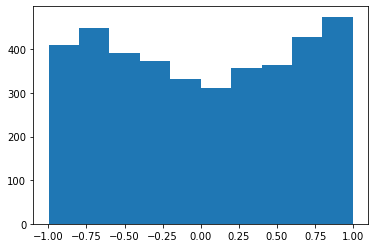

ixicwtigold5
NormaltestResult(statistic=4718.186389765858, pvalue=0.0)
SkewtestResult(statistic=-7.15074311322473, pvalue=8.630937644100219e-13)
KurtosistestResult(statistic=-68.31583464098588, pvalue=0.0)


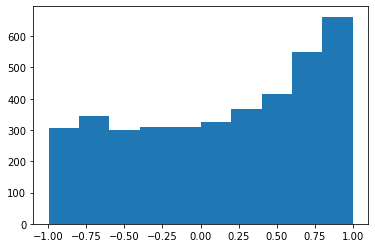

rutwti5
NormaltestResult(statistic=1976.3556830373414, pvalue=0.0)
SkewtestResult(statistic=-10.683980037887709, pvalue=1.2097144891726994e-26)
KurtosistestResult(statistic=-43.15331103852123, pvalue=0.0)


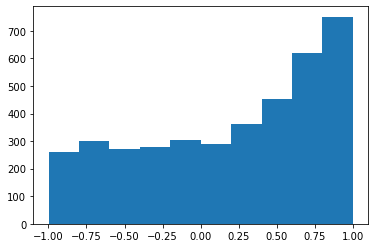

rutgold5
NormaltestResult(statistic=73067.62062378979, pvalue=0.0)
SkewtestResult(statistic=-0.9823216170690289, pvalue=0.3259414281170706)
KurtosistestResult(statistic=270.3084454249079, pvalue=0.0)


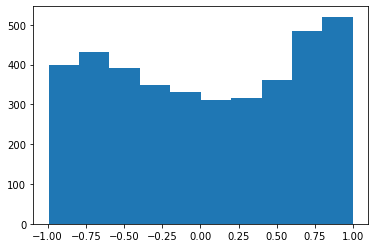

rutwtigold5
NormaltestResult(statistic=2882.0083114304143, pvalue=0.0)
SkewtestResult(statistic=-8.791415016259103, pvalue=1.476879184996454e-18)
KurtosistestResult(statistic=-52.95960095622236, pvalue=0.0)


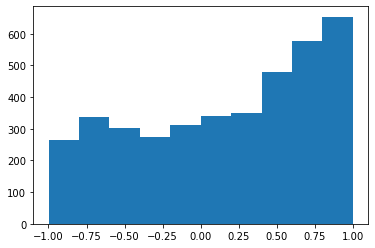

wtigold5
NormaltestResult(statistic=1495.675946334185, pvalue=0.0)
SkewtestResult(statistic=-11.77777617568185, pvalue=5.08160915031551e-32)
KurtosistestResult(statistic=-36.83693709701888, pvalue=4.734031977107688e-297)


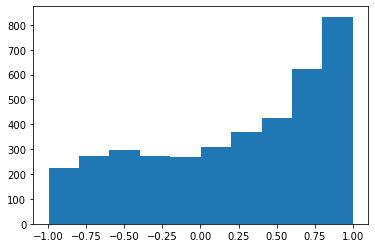

wtiwtigold5
NormaltestResult(statistic=2002.155810325709, pvalue=0.0)
SkewtestResult(statistic=-38.39525045746239, pvalue=0.0)
KurtosistestResult(statistic=22.977392207003017, pvalue=7.845908852886957e-117)


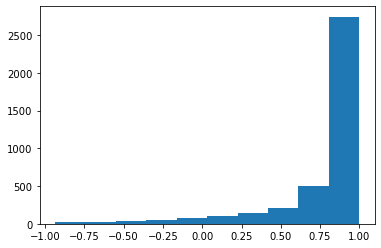

goldwtigold5
NormaltestResult(statistic=2085.288128559434, pvalue=0.0)
SkewtestResult(statistic=10.151660056948723, pvalue=3.2577412212054802e-24)
KurtosistestResult(statistic=-44.52226326960014, pvalue=0.0)


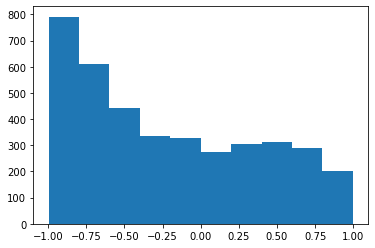

gspcvix15
NormaltestResult(statistic=1674.6361806300597, pvalue=0.0)
SkewtestResult(statistic=35.267030822805836, pvalue=1.8811277334009305e-272)
KurtosistestResult(statistic=20.757473776288936, pvalue=1.049401261862135e-95)


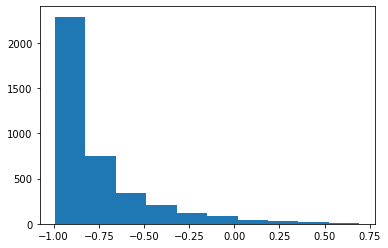

gspctnx15
NormaltestResult(statistic=581.7136480324546, pvalue=4.813780749705102e-127)
SkewtestResult(statistic=-13.433223166896434, pvalue=3.8622783460898503e-41)
KurtosistestResult(statistic=-20.031529232208197, pvalue=2.9253552975787466e-89)


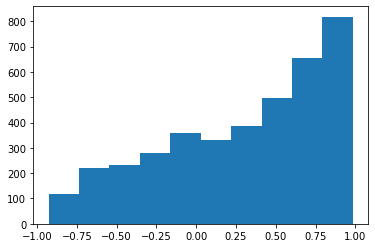

gspcixic15
NormaltestResult(statistic=2713.093505678661, pvalue=0.0)
SkewtestResult(statistic=-43.40689951800704, pvalue=0.0)
KurtosistestResult(statistic=28.79122400858119, pvalue=2.762489445940939e-182)


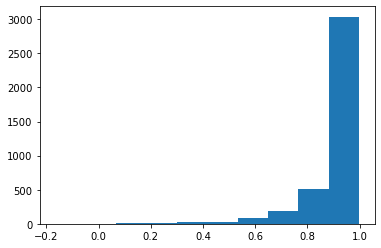

gspcrut15
NormaltestResult(statistic=2339.3996222671854, pvalue=0.0)
SkewtestResult(statistic=-40.995150569436404, pvalue=0.0)
KurtosistestResult(statistic=25.667046032927576, pvalue=2.728360800619909e-145)


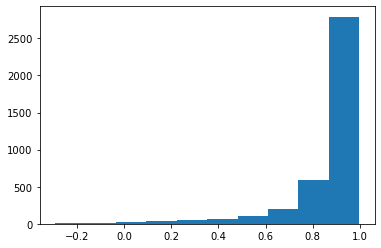

gspcwti15
NormaltestResult(statistic=3171.8919828735893, pvalue=0.0)
SkewtestResult(statistic=-6.858578639308619, pvalue=6.954904321708934e-12)
KurtosistestResult(statistic=-55.90037461343179, pvalue=0.0)


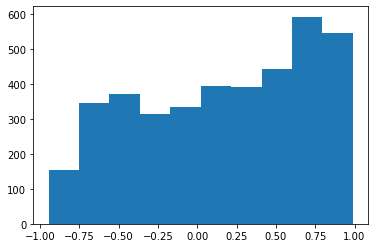

gspcgold15
NormaltestResult(statistic=6260.912368272655, pvalue=0.0)
SkewtestResult(statistic=-0.1879717929960226, pvalue=0.8508987629407282)
KurtosistestResult(statistic=-79.12570400873342, pvalue=0.0)


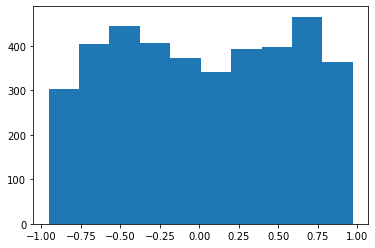

gspcwtigold15
NormaltestResult(statistic=3002.6794750696104, pvalue=0.0)
SkewtestResult(statistic=-7.374636451396038, pvalue=1.6479411871529204e-13)
KurtosistestResult(statistic=-54.29819713654728, pvalue=0.0)


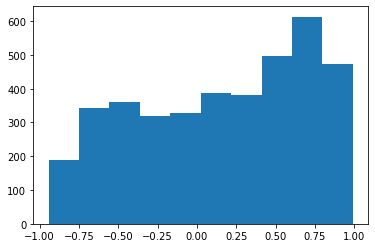

vixtnx15
NormaltestResult(statistic=644.9146521098793, pvalue=9.089974084732307e-141)
SkewtestResult(statistic=11.64944198003203, pvalue=2.309662474297152e-31)
KurtosistestResult(statistic=-22.56557452545241, pvalue=9.443885872837716e-113)


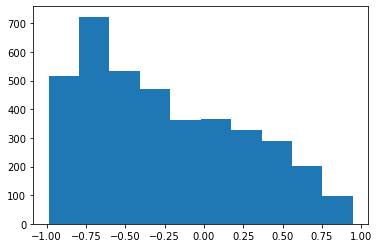

vixixic15
NormaltestResult(statistic=1252.7491710879058, pvalue=9.310519066823895e-273)
SkewtestResult(statistic=31.19023692735681, pvalue=1.4452224239154502e-213)
KurtosistestResult(statistic=16.73075884421425, pvalue=7.82351364594713e-63)


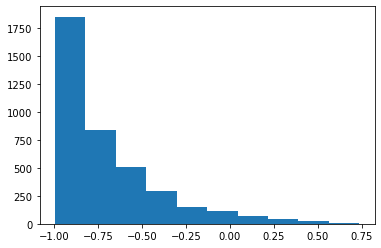

vixrut15
NormaltestResult(statistic=1119.6896904844934, pvalue=7.285728599471132e-244)
SkewtestResult(statistic=29.76251737976849, pvalue=1.1943722779066068e-194)
KurtosistestResult(statistic=15.2932092676283, pvalue=8.486307181727993e-53)


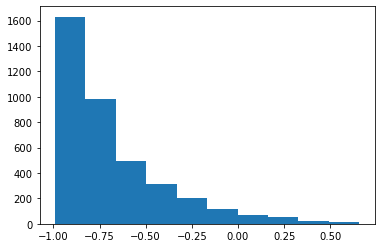

vixwti15
NormaltestResult(statistic=1630.9566909007754, pvalue=0.0)
SkewtestResult(statistic=6.023124795390662, pvalue=1.7108142705341928e-09)
KurtosistestResult(statistic=-39.93342783433355, pvalue=0.0)


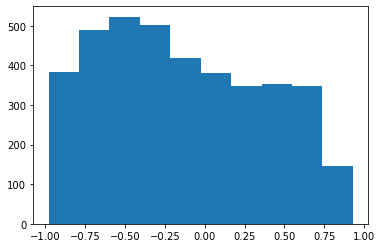

vixgold15
NormaltestResult(statistic=2223.0624950687793, pvalue=0.0)
SkewtestResult(statistic=0.20455858937005353, pvalue=0.8379170120625377)
KurtosistestResult(statistic=-47.14891993304082, pvalue=0.0)


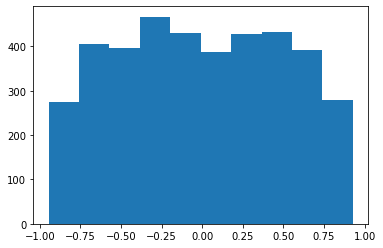

vixwtigold15
NormaltestResult(statistic=1716.5504444808455, pvalue=0.0)
SkewtestResult(statistic=6.650141239592942, pvalue=2.928118950330126e-11)
KurtosistestResult(statistic=-40.894083508183805, pvalue=0.0)


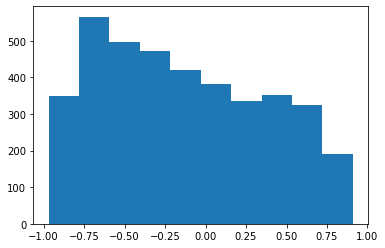

tnxixic15
NormaltestResult(statistic=673.7507718938343, pvalue=4.975981926059662e-147)
SkewtestResult(statistic=-12.56635209247259, pvalue=3.233003010469995e-36)
KurtosistestResult(statistic=-22.712057744331403, pvalue=3.405189216062661e-114)


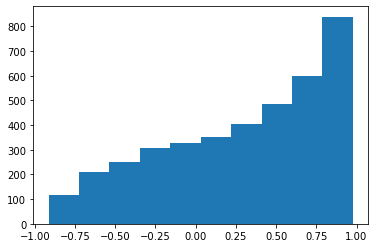

tnxrut15
NormaltestResult(statistic=499.02070470502713, pvalue=4.355427566723495e-109)
SkewtestResult(statistic=-14.142004089829799, pvalue=2.092395394882413e-45)
KurtosistestResult(statistic=-17.29232271929553, pvalue=5.3742446537634146e-67)


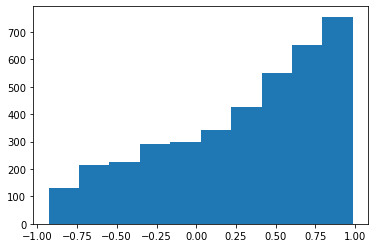

tnxwti15
NormaltestResult(statistic=1915.5482846223142, pvalue=0.0)
SkewtestResult(statistic=-6.580340967347948, pvalue=4.693706332344494e-11)
KurtosistestResult(statistic=-43.26947419805048, pvalue=0.0)


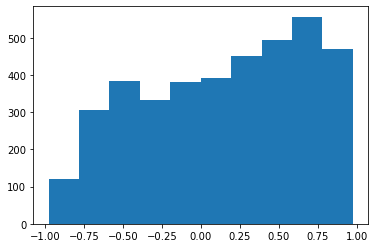

tnxgold15
NormaltestResult(statistic=1629.3144905162633, pvalue=0.0)
SkewtestResult(statistic=8.5637101189251, pvalue=1.0929241651790521e-17)
KurtosistestResult(statistic=-39.445878866052446, pvalue=0.0)


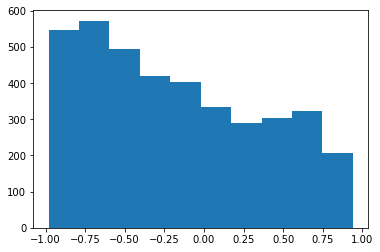

tnxwtigold15
NormaltestResult(statistic=1060.4639297796443, pvalue=5.28668603844347e-231)
SkewtestResult(statistic=-10.968106247646567, pvalue=5.43998199548292e-28)
KurtosistestResult(statistic=-30.662103240318995, pvalue=1.8227784252003548e-206)


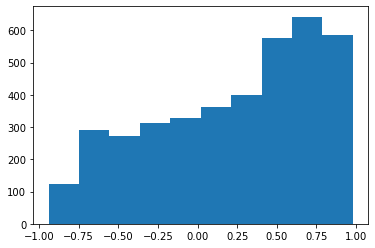

ixicrut15
NormaltestResult(statistic=2538.3361197920217, pvalue=0.0)
SkewtestResult(statistic=-42.37684439523169, pvalue=0.0)
KurtosistestResult(statistic=27.249572086444626, pvalue=1.6813706343390837e-163)


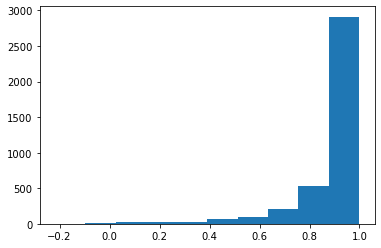

ixicwti15
NormaltestResult(statistic=3620.716235523779, pvalue=0.0)
SkewtestResult(statistic=-6.272737349839822, pvalue=3.5475506607438453e-10)
KurtosistestResult(statistic=-59.844540282833684, pvalue=0.0)


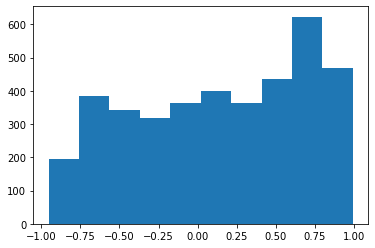

ixicgold15
NormaltestResult(statistic=6239.977732603705, pvalue=0.0)
SkewtestResult(statistic=-1.2843642985426436, pvalue=0.19901451863283037)
KurtosistestResult(statistic=-78.9830876894056, pvalue=0.0)


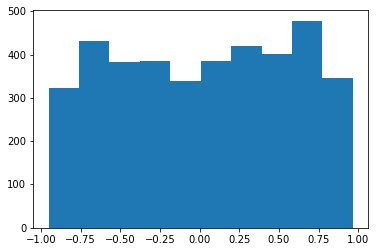

ixicwtigold15
NormaltestResult(statistic=3219.8535555464955, pvalue=0.0)
SkewtestResult(statistic=-6.07618438198311, pvalue=1.230758875085063e-09)
KurtosistestResult(statistic=-56.417493199384886, pvalue=0.0)


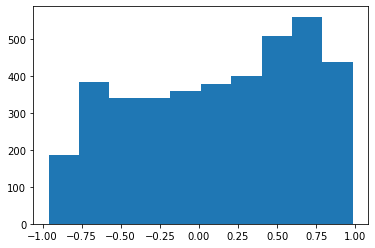

rutwti15
NormaltestResult(statistic=3028.559087173839, pvalue=0.0)
SkewtestResult(statistic=-7.554437916510376, pvalue=4.206725614997541e-14)
KurtosistestResult(statistic=-54.51137087745482, pvalue=0.0)


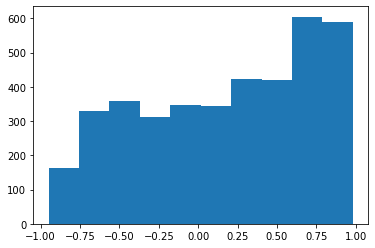

rutgold15
NormaltestResult(statistic=8836.467146783358, pvalue=0.0)
SkewtestResult(statistic=-2.512243122719475, pvalue=0.01199664082686365)
KurtosistestResult(statistic=-93.96890858829694, pvalue=0.0)


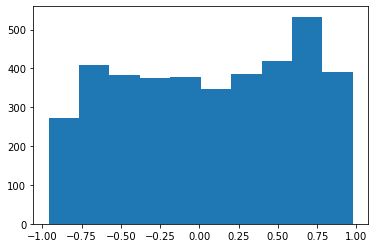

rutwtigold15
NormaltestResult(statistic=3186.9210915598446, pvalue=0.0)
SkewtestResult(statistic=-6.684856976038908, pvalue=2.31150283297193e-11)
KurtosistestResult(statistic=-56.055631106693895, pvalue=0.0)


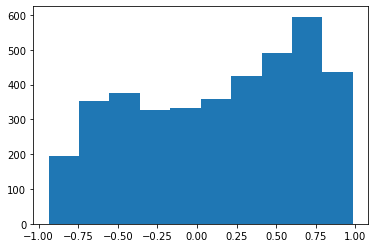

wtigold15
NormaltestResult(statistic=903.2981174362612, pvalue=7.100779748122984e-197)
SkewtestResult(statistic=-11.40467963841993, pvalue=3.962332798423214e-30)
KurtosistestResult(statistic=-27.80703867335159, pvalue=3.5658279409857884e-170)


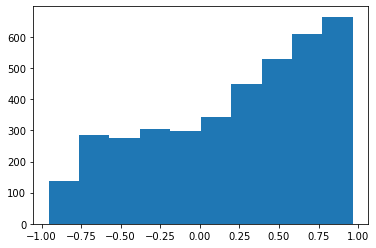

wtiwtigold15
NormaltestResult(statistic=2116.849450261947, pvalue=0.0)
SkewtestResult(statistic=-38.99093830734852, pvalue=0.0)
KurtosistestResult(statistic=24.424499589029217, pvalue=9.394221861154157e-132)


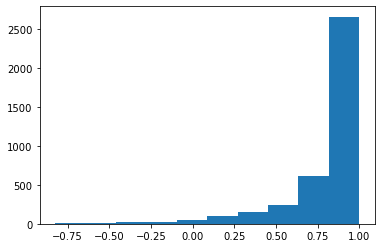

goldwtigold15
NormaltestResult(statistic=891.7571044923509, pvalue=2.277220896991665e-194)
SkewtestResult(statistic=10.814396466768937, pvalue=2.942228733010531e-27)
KurtosistestResult(statistic=-27.835336059618292, pvalue=1.6211161247892241e-170)


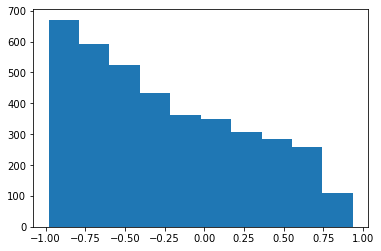

gspcvix50
NormaltestResult(statistic=853.2211926345504, pvalue=5.31339494138309e-186)
SkewtestResult(statistic=27.100704044522665, pvalue=9.660034196964809e-162)
KurtosistestResult(statistic=10.898304130723428, pvalue=1.1742543501574049e-27)


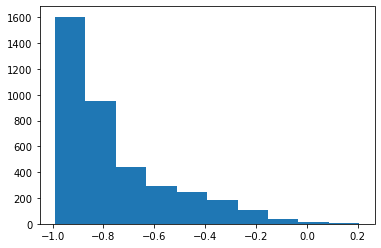

gspctnx50
NormaltestResult(statistic=352.67459111973517, pvalue=2.616288212954103e-77)
SkewtestResult(statistic=-14.721137427012419, pvalue=4.7165985218742546e-49)
KurtosistestResult(statistic=-11.660304626155757, pvalue=2.0331368603427097e-31)


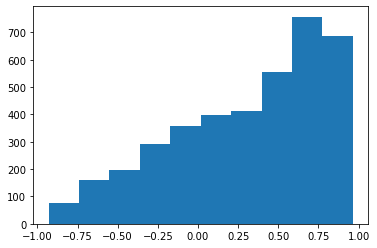

gspcixic50
NormaltestResult(statistic=2466.263994619142, pvalue=0.0)
SkewtestResult(statistic=-42.07299688582539, pvalue=0.0)
KurtosistestResult(statistic=26.384217397233318, pvalue=2.079373488388758e-153)


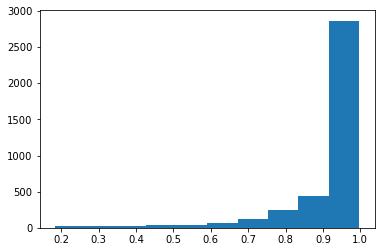

gspcrut50
NormaltestResult(statistic=2330.5031269523724, pvalue=0.0)
SkewtestResult(statistic=-40.766032012375604, pvalue=0.0)
KurtosistestResult(statistic=25.857953533068702, pvalue=1.9802608699993048e-147)


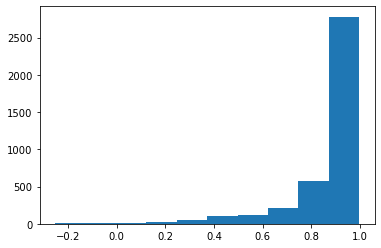

gspcwti50
NormaltestResult(statistic=734.577382414999, pvalue=3.0799817497061626e-160)
SkewtestResult(statistic=-9.490474816162697, pvalue=2.299842769986294e-21)
KurtosistestResult(statistic=-25.387167431180277, pvalue=3.495118701700608e-142)


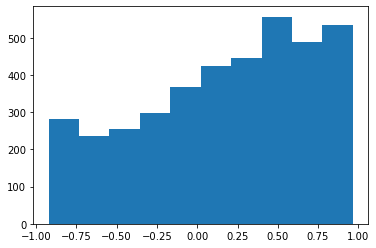

gspcgold50
NormaltestResult(statistic=5172.253799219688, pvalue=0.0)
SkewtestResult(statistic=0.16899452294875897, pvalue=0.8658009494926527)
KurtosistestResult(statistic=-71.9181843490984, pvalue=0.0)


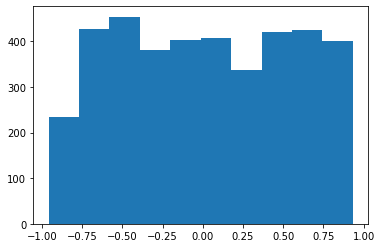

gspcwtigold50
NormaltestResult(statistic=963.2757071773343, pvalue=6.719514736400072e-210)
SkewtestResult(statistic=-7.734249213848299, pvalue=1.0401510174388135e-14)
KurtosistestResult(statistic=-30.057563046185585, pvalue=1.7389661985813834e-198)


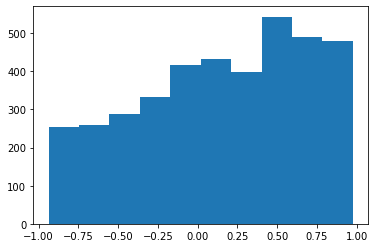

vixtnx50
NormaltestResult(statistic=433.33839620394434, pvalue=7.975590840120803e-95)
SkewtestResult(statistic=10.142641314591375, pvalue=3.573054851656284e-24)
KurtosistestResult(statistic=-18.17870246655378, pvalue=7.61134312563708e-74)


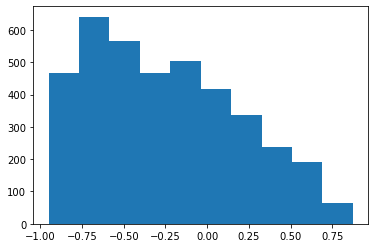

vixixic50
NormaltestResult(statistic=701.5220194593394, pvalue=4.6390495106860054e-153)
SkewtestResult(statistic=25.09263451286615, pvalue=5.984823611500474e-139)
KurtosistestResult(statistic=8.478308360932498, pvalue=2.2849171831276037e-17)


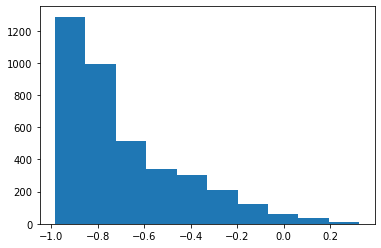

vixrut50
NormaltestResult(statistic=1094.4591568559044, pvalue=2.1938844730957395e-238)
SkewtestResult(statistic=28.779119377043045, pvalue=3.9156668646694597e-182)
KurtosistestResult(statistic=16.31629384197925, pvalue=7.558751214043812e-60)


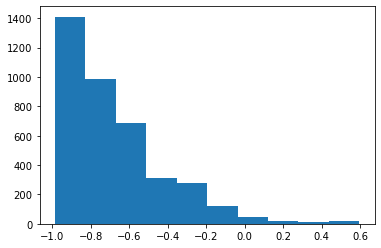

vixwti50
NormaltestResult(statistic=1213.6651824393136, pvalue=2.857289164524537e-264)
SkewtestResult(statistic=5.6314298889946315, pvalue=1.7872162845918346e-08)
KurtosistestResult(statistic=-34.37953140815988, pvalue=5.100569318602282e-259)


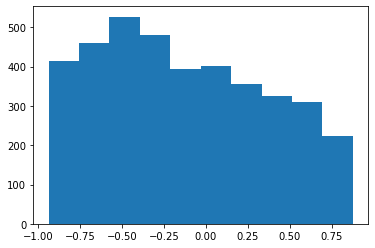

vixgold50
NormaltestResult(statistic=1025.0326297853983, pvalue=2.6121165854575292e-223)
SkewtestResult(statistic=1.9553838703511128, pvalue=0.05053777848039651)
KurtosistestResult(statistic=-31.956362491763187, pvalue=4.407772588422036e-224)


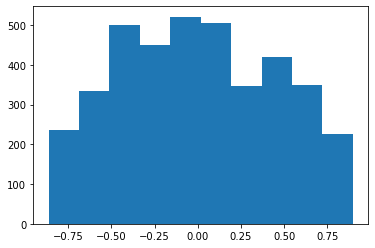

vixwtigold50
NormaltestResult(statistic=1592.103744306204, pvalue=0.0)
SkewtestResult(statistic=3.273653647891516, pvalue=0.0010616665412904922)
KurtosistestResult(statistic=-39.766656083958715, pvalue=0.0)


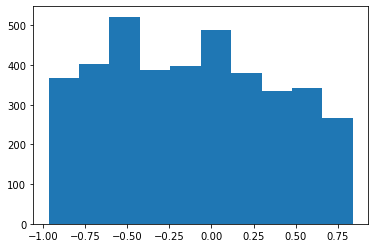

tnxixic50
NormaltestResult(statistic=293.60340685076295, pvalue=1.757236713770399e-64)
SkewtestResult(statistic=-16.17783597727526, pvalue=7.229092495645648e-59)
KurtosistestResult(statistic=-5.646328890805169, pvalue=1.6391014252173595e-08)


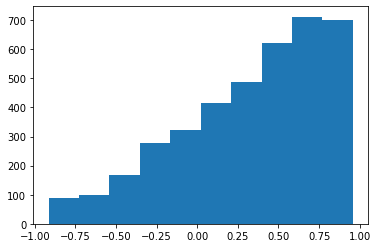

tnxrut50
NormaltestResult(statistic=330.7654113184795, pvalue=1.4969370238730871e-72)
SkewtestResult(statistic=-17.34859534342329, pvalue=2.0212633719336557e-67)
KurtosistestResult(statistic=-5.458172856243305, pvalue=4.81059217212397e-08)


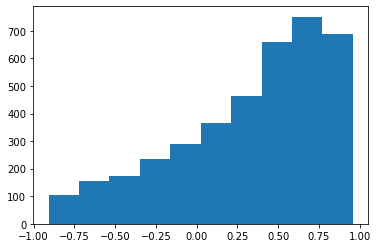

tnxwti50
NormaltestResult(statistic=2637.4670717926947, pvalue=0.0)
SkewtestResult(statistic=-6.325977307258858, pvalue=2.5163479747477183e-10)
KurtosistestResult(statistic=-50.96517519739082, pvalue=0.0)


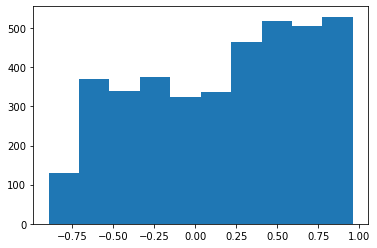

tnxgold50
NormaltestResult(statistic=861.2997396515549, pvalue=9.357027423623637e-188)
SkewtestResult(statistic=8.406754872283313, pvalue=4.2151075487135287e-17)
KurtosistestResult(statistic=-28.118076252988853, pvalue=5.889877772926114e-174)


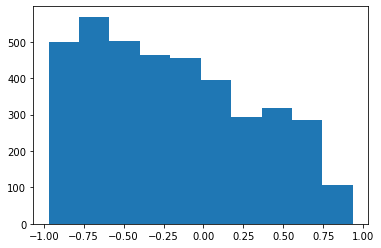

tnxwtigold50
NormaltestResult(statistic=1802.1897339413697, pvalue=0.0)
SkewtestResult(statistic=-9.474580835935004, pvalue=2.6783385021784672e-21)
KurtosistestResult(statistic=-41.38142157931144, pvalue=0.0)


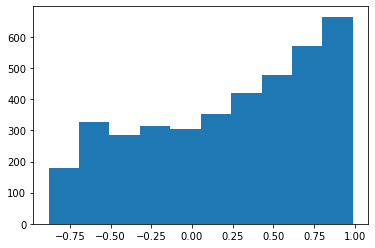

ixicrut50
NormaltestResult(statistic=2539.2325107545594, pvalue=0.0)
SkewtestResult(statistic=-42.21381755111396, pvalue=0.0)
KurtosistestResult(statistic=27.517741886205382, pvalue=1.076944206951162e-166)


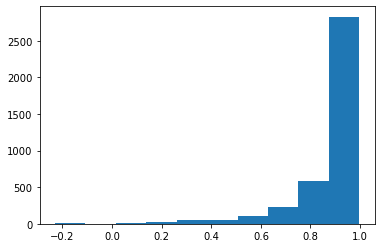

ixicwti50
NormaltestResult(statistic=1832.0287282574166, pvalue=0.0)
SkewtestResult(statistic=-7.91073143050415, pvalue=2.5588101374728212e-15)
KurtosistestResult(statistic=-42.064819701168936, pvalue=0.0)


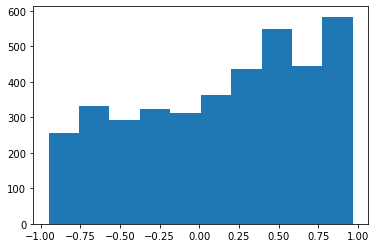

ixicgold50
NormaltestResult(statistic=7135.154098182136, pvalue=0.0)
SkewtestResult(statistic=1.7223329671611538, pvalue=0.08500921899338755)
KurtosistestResult(statistic=-84.45228041522837, pvalue=0.0)


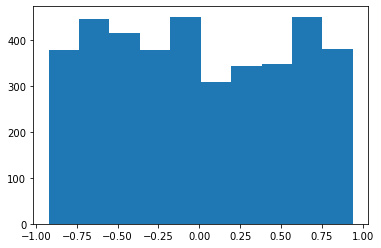

ixicwtigold50
NormaltestResult(statistic=1388.6207878965756, pvalue=2.9162663064337804e-302)
SkewtestResult(statistic=-6.625364833202415, pvalue=3.463915722237269e-11)
KurtosistestResult(statistic=-36.67049670680151, pvalue=2.1572771109991077e-294)


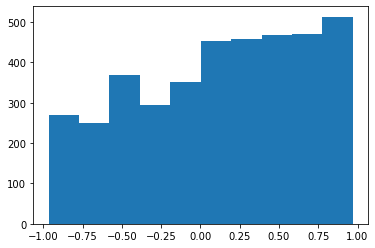

rutwti50
NormaltestResult(statistic=1005.6759573598571, pvalue=4.1710036310766604e-219)
SkewtestResult(statistic=-9.906597135847099, pvalue=3.8969313002340564e-23)
KurtosistestResult(statistic=-30.12532639736677, pvalue=2.258118142700018e-199)


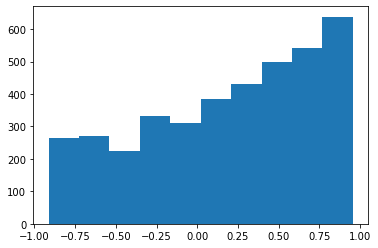

rutgold50
NormaltestResult(statistic=2234.3717381076226, pvalue=0.0)
SkewtestResult(statistic=-3.2177626437223825, pvalue=0.0012919468229462253)
KurtosistestResult(statistic=-47.159492593499, pvalue=0.0)


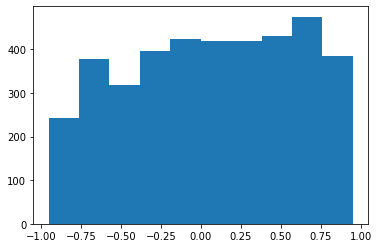

rutwtigold50
NormaltestResult(statistic=1181.0955538935536, pvalue=3.37566368599086e-257)
SkewtestResult(statistic=-6.939722735605918, pvalue=3.928702408786571e-12)
KurtosistestResult(statistic=-33.659111726937596, pvalue=2.2938831141702886e-248)


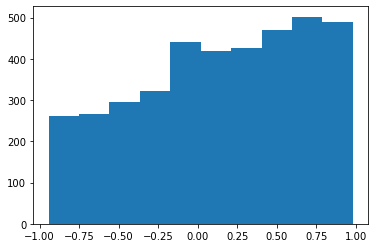

wtigold50
NormaltestResult(statistic=1049.4877751618128, pvalue=1.2782776958334835e-228)
SkewtestResult(statistic=-9.83675565057861, pvalue=7.819171746703936e-23)
KurtosistestResult(statistic=-30.86626011412174, pvalue=3.3898165522276656e-209)


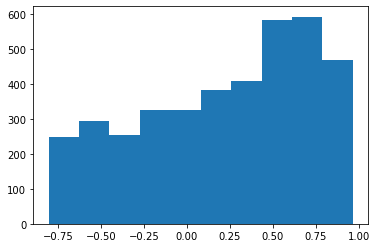

wtiwtigold50
NormaltestResult(statistic=1935.8070354313093, pvalue=0.0)
SkewtestResult(statistic=-37.70654248643005, pvalue=0.0)
KurtosistestResult(statistic=22.67209053330448, pvalue=8.448542438310394e-114)


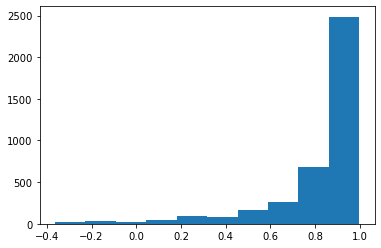

goldwtigold50
NormaltestResult(statistic=2139.369899410702, pvalue=0.0)
SkewtestResult(statistic=9.239666535791612, pvalue=2.472666300195305e-20)
KurtosistestResult(statistic=-45.32105980356235, pvalue=0.0)


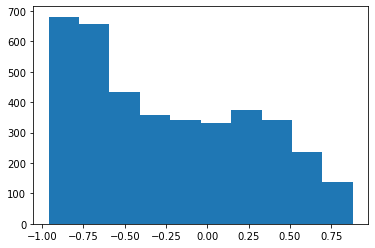

gspcvix100
NormaltestResult(statistic=1009.4431912639008, pvalue=6.341560201504426e-220)
SkewtestResult(statistic=28.569021605114813, pvalue=1.630518578149051e-179)
KurtosistestResult(statistic=13.90158968572961, pvalue=6.194999309236817e-44)


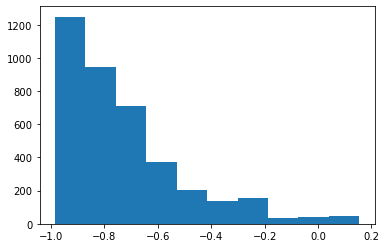

gspctnx100
NormaltestResult(statistic=388.267898212413, pvalue=4.8831172579018093e-85)
SkewtestResult(statistic=-11.975540088278624, pvalue=4.773190715569568e-33)
KurtosistestResult(statistic=-15.647822142600056, pvalue=3.437845384125317e-55)


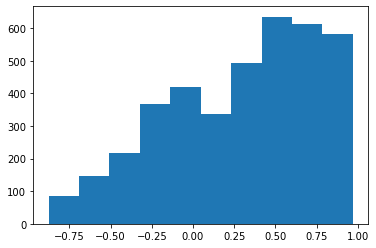

gspcixic100
NormaltestResult(statistic=2488.1616882263916, pvalue=0.0)
SkewtestResult(statistic=-41.749096305050266, pvalue=0.0)
KurtosistestResult(statistic=27.297887206485957, pvalue=4.493779590370694e-164)


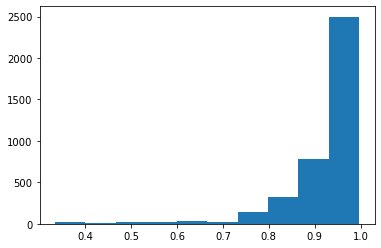

gspcrut100
NormaltestResult(statistic=2446.3164516732004, pvalue=0.0)
SkewtestResult(statistic=-42.00629452170821, pvalue=0.0)
KurtosistestResult(statistic=26.111064172658818, pvalue=2.730039151742352e-150)


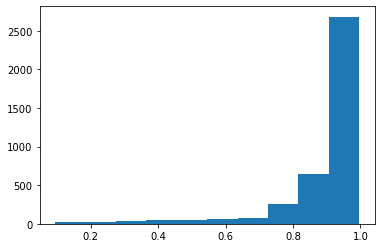

gspcwti100
NormaltestResult(statistic=2394.0025098217557, pvalue=0.0)
SkewtestResult(statistic=-9.732950755132546, pvalue=2.181706081397401e-22)
KurtosistestResult(statistic=-47.95072657864446, pvalue=0.0)


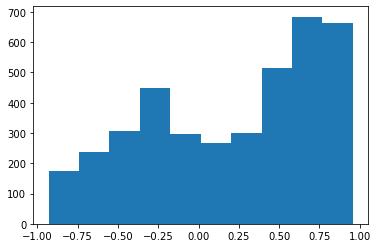

gspcgold100
NormaltestResult(statistic=1430.2065074603759, pvalue=2.720213013315e-311)
SkewtestResult(statistic=-4.861943859427286, pvalue=1.1623859324442684e-06)
KurtosistestResult(statistic=-37.50423988522035, pvalue=7.855774953029156e-308)


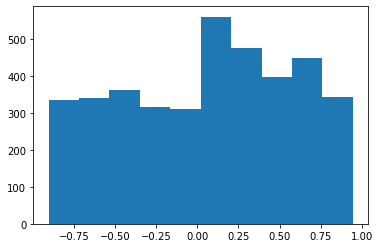

gspcwtigold100
NormaltestResult(statistic=2805.376352359969, pvalue=0.0)
SkewtestResult(statistic=-5.636837901530545, pvalue=1.7320100364910526e-08)
KurtosistestResult(statistic=-52.66500176428211, pvalue=0.0)


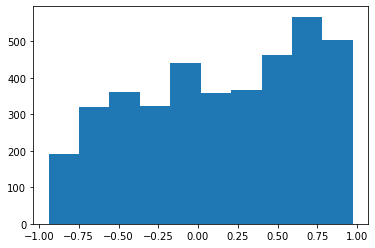

vixtnx100
NormaltestResult(statistic=488.13104422707227, pvalue=1.0085339521481461e-106)
SkewtestResult(statistic=8.404261725795905, pvalue=4.3056151597709907e-17)
KurtosistestResult(statistic=-20.432802770824033, pvalue=8.545331708453933e-93)


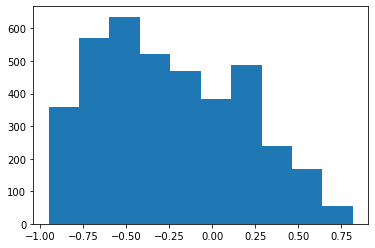

vixixic100
NormaltestResult(statistic=810.7588980292508, pvalue=8.829624121124062e-177)
SkewtestResult(statistic=25.941562808960608, pvalue=2.264004207530275e-148)
KurtosistestResult(statistic=11.738578153166703, pvalue=8.083398436990041e-32)


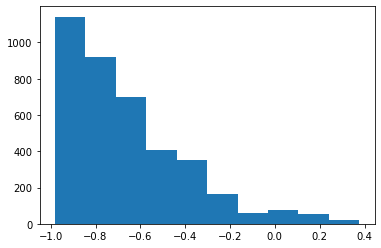

vixrut100
NormaltestResult(statistic=622.4530186705168, pvalue=6.855582692343411e-136)
SkewtestResult(statistic=23.779066376291762, pvalue=5.500175539603328e-125)
KurtosistestResult(statistic=7.550431838141932, pvalue=4.3381739564536054e-14)


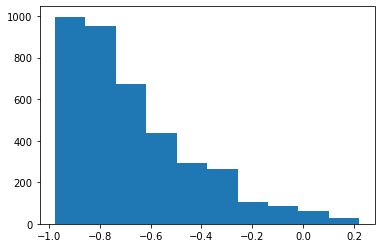

vixwti100
NormaltestResult(statistic=3166.8109617114956, pvalue=0.0)
SkewtestResult(statistic=2.9450220176943023, pvalue=0.0032293168158254253)
KurtosistestResult(statistic=-56.19731138610451, pvalue=0.0)


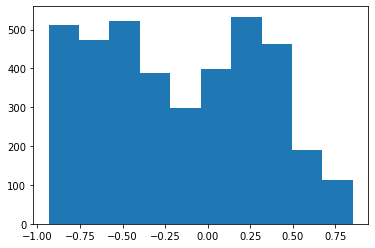

vixgold100
NormaltestResult(statistic=321.4504551010324, pvalue=1.5773227677890415e-70)
SkewtestResult(statistic=6.6659136715584015, pvalue=2.6302384041738166e-11)
KurtosistestResult(statistic=-16.64379914635968, pvalue=3.356315486867982e-62)


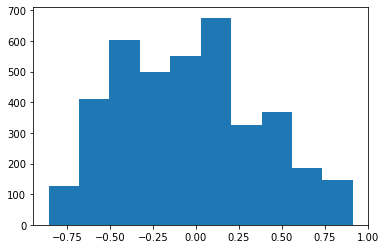

vixwtigold100
NormaltestResult(statistic=1599.5125050301212, pvalue=0.0)
SkewtestResult(statistic=-0.08952032550226431, pvalue=0.928668401017813)
KurtosistestResult(statistic=-39.993805659644885, pvalue=0.0)


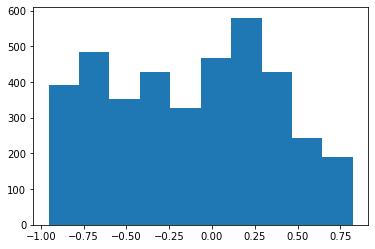

tnxixic100
NormaltestResult(statistic=453.2878556878687, pvalue=3.71357996866584e-99)
SkewtestResult(statistic=-12.769127006484318, pvalue=2.4387430750168265e-37)
KurtosistestResult(statistic=-17.036350876292186, pvalue=4.414296518106011e-65)


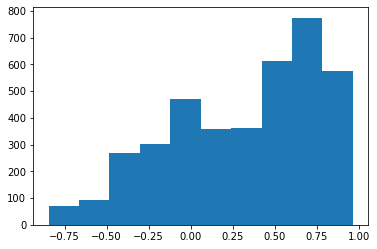

tnxrut100
NormaltestResult(statistic=443.57882448046905, pvalue=4.765210822948177e-97)
SkewtestResult(statistic=-13.565051561970954, pvalue=6.453427113166462e-42)
KurtosistestResult(statistic=-16.11112040180752, pvalue=2.1312696147363543e-58)


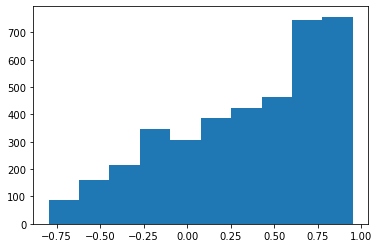

tnxwti100
NormaltestResult(statistic=1317.6370792865996, pvalue=7.563863056495576e-287)
SkewtestResult(statistic=-11.505445708851088, pvalue=1.2384787769441963e-30)
KurtosistestResult(statistic=-34.4276313203113, pvalue=9.735044995863597e-260)


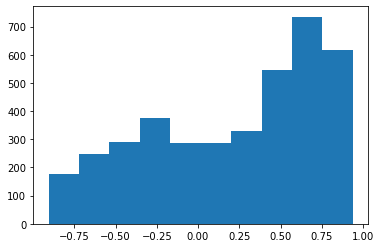

tnxgold100
NormaltestResult(statistic=5060.691077270349, pvalue=0.0)
SkewtestResult(statistic=4.6230026683468886, pvalue=3.782248556042598e-06)
KurtosistestResult(statistic=-70.98816044664636, pvalue=0.0)


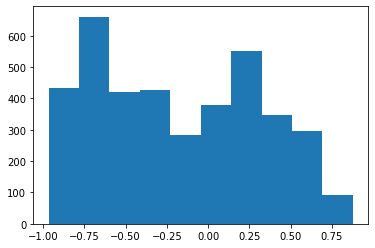

tnxwtigold100
NormaltestResult(statistic=666.3666632260949, pvalue=1.9967220702029793e-145)
SkewtestResult(statistic=-13.618441207048626, pvalue=3.1113792956300724e-42)
KurtosistestResult(statistic=-21.929539947665454, pvalue=1.3579334869611448e-106)


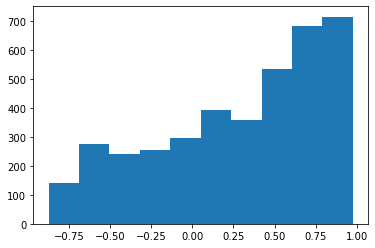

ixicrut100
NormaltestResult(statistic=3357.655643004171, pvalue=0.0)
SkewtestResult(statistic=-48.59064864333454, pvalue=0.0)
KurtosistestResult(statistic=31.569043498721697, pvalue=9.824825475329909e-219)


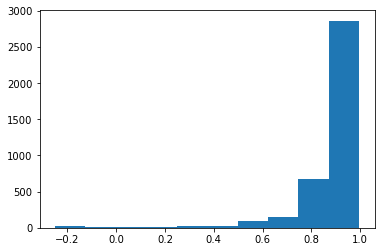

ixicwti100
NormaltestResult(statistic=6260.003247068649, pvalue=0.0)
SkewtestResult(statistic=-9.757202702077171, pvalue=1.7182929090144703e-22)
KurtosistestResult(statistic=-78.51624190254668, pvalue=0.0)


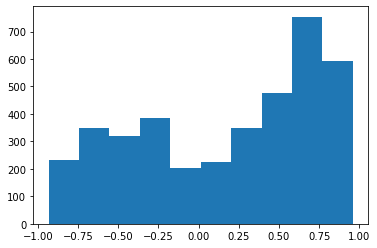

ixicgold100
NormaltestResult(statistic=2095.9358275444556, pvalue=0.0)
SkewtestResult(statistic=-4.5044900615434935, pvalue=6.6532511365438935e-06)
KurtosistestResult(statistic=-45.559251495496625, pvalue=0.0)


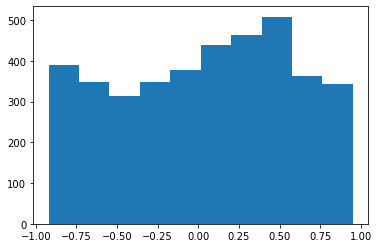

ixicwtigold100
NormaltestResult(statistic=6983.9270806534405, pvalue=0.0)
SkewtestResult(statistic=-5.515801353477505, pvalue=3.471942529371561e-08)
KurtosistestResult(statistic=-83.3876670502444, pvalue=0.0)


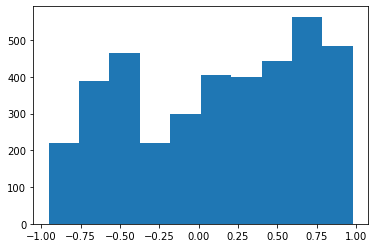

rutwti100
NormaltestResult(statistic=1619.2387684889181, pvalue=0.0)
SkewtestResult(statistic=-11.450300341301675, pvalue=2.3433219218491584e-30)
KurtosistestResult(statistic=-38.5762801548167, pvalue=0.0)


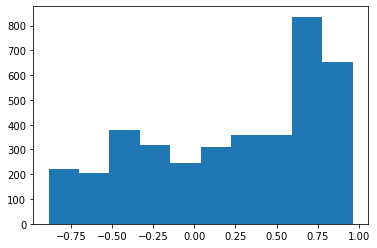

rutgold100
NormaltestResult(statistic=1112.114729204263, pvalue=3.2162880092679e-242)
SkewtestResult(statistic=-8.41214971955884, pvalue=4.0256357669245364e-17)
KurtosistestResult(statistic=-32.26996229157991, pvalue=1.8464813692992288e-228)


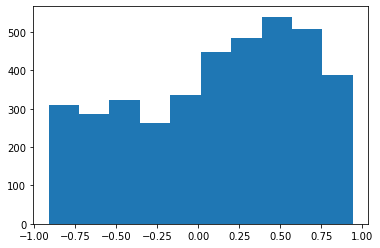

rutwtigold100
NormaltestResult(statistic=5346.885617178367, pvalue=0.0)
SkewtestResult(statistic=-5.658561800844194, pvalue=1.526467491880469e-08)
KurtosistestResult(statistic=-72.90312953175875, pvalue=0.0)


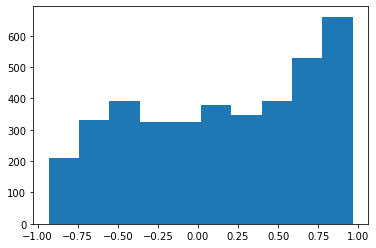

wtigold100
NormaltestResult(statistic=849.2363767172809, pvalue=3.896403098976914e-185)
SkewtestResult(statistic=-11.141056115669878, pvalue=7.917482376259858e-29)
KurtosistestResult(statistic=-26.92792686681943, pvalue=1.0346647562549157e-159)


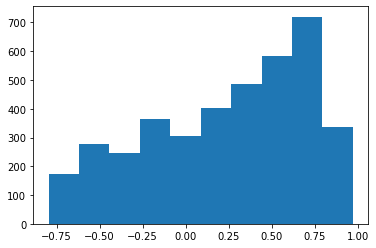

wtiwtigold100
NormaltestResult(statistic=1546.1076918144745, pvalue=0.0)
SkewtestResult(statistic=-34.674940507568074, pvalue=1.8804126949552498e-263)
KurtosistestResult(statistic=18.540663219288817, pvalue=9.701785985760741e-77)


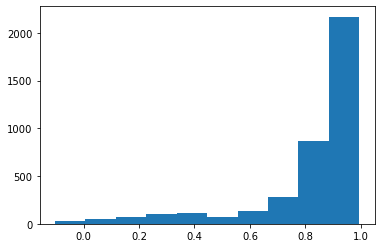

goldwtigold100
NormaltestResult(statistic=1305.5388282713516, pvalue=3.205128793142897e-284)
SkewtestResult(statistic=9.649648344955967, pvalue=4.932457927463087e-22)
KurtosistestResult(statistic=-34.81986667249087, pvalue=1.2173660382562492e-265)


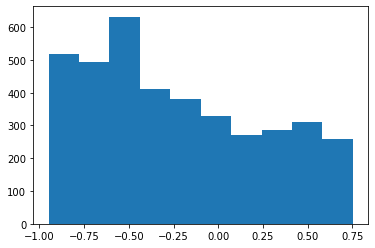

vix_pr
NormaltestResult(statistic=1086.3699834232398, pvalue=1.2524357245992995e-236)
SkewtestResult(statistic=31.57540489572303, pvalue=8.035489007837042e-219)
KurtosistestResult(statistic=9.453242253025676, pvalue=3.284945583000607e-21)


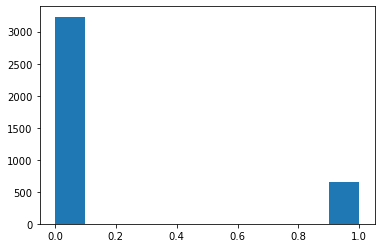

In [88]:
print(len(df.columns))
columns_list_2 = []

for i in df.columns:
    if i != 'date_added':
        print(i)
        print(scipy.stats.normaltest(df[i]))
        print(scipy.stats.skewtest(df[i]))
        print(scipy.stats.kurtosistest(df[i]))
        plt.hist(df[i])
        plt.show()
        if scipy.stats.normaltest(df[i]).statistic < 2000:
            columns_list_2.append(i)

if 'vix_pr' not in columns_list_2:
    columns_list_2.append('vix_pr')

In [89]:
for i in df0_columns:
    if i in columns_list_2:
        columns_list_2.remove(i)

In [90]:
columns_list_2

['gspcvix5',
 'gspctnx5',
 'gspcwti5',
 'vixtnx5',
 'vixixic5',
 'vixrut5',
 'tnxixic5',
 'tnxrut5',
 'tnxwtigold5',
 'rutwti5',
 'wtigold5',
 'gspcvix15',
 'gspctnx15',
 'vixtnx15',
 'vixixic15',
 'vixrut15',
 'vixwti15',
 'vixwtigold15',
 'tnxixic15',
 'tnxrut15',
 'tnxwti15',
 'tnxgold15',
 'tnxwtigold15',
 'wtigold15',
 'goldwtigold15',
 'gspcvix50',
 'gspctnx50',
 'gspcwti50',
 'gspcwtigold50',
 'vixtnx50',
 'vixixic50',
 'vixrut50',
 'vixwti50',
 'vixgold50',
 'vixwtigold50',
 'tnxixic50',
 'tnxrut50',
 'tnxgold50',
 'tnxwtigold50',
 'ixicwti50',
 'ixicwtigold50',
 'rutwti50',
 'rutwtigold50',
 'wtigold50',
 'wtiwtigold50',
 'gspcvix100',
 'gspctnx100',
 'gspcgold100',
 'vixtnx100',
 'vixixic100',
 'vixrut100',
 'vixgold100',
 'vixwtigold100',
 'tnxixic100',
 'tnxrut100',
 'tnxwti100',
 'tnxwtigold100',
 'rutwti100',
 'rutgold100',
 'wtigold100',
 'wtiwtigold100',
 'goldwtigold100',
 'vix_pr']

In [91]:
columns_list_0 = ['vixgspc5', 'gspctnx5', 'tnxwti5', 'goldtnx5', 'gspcwti5', 'gspcgold5', 'vix_pr', 'tnxwtigold5',\
        'vixgspc15', 'gspctnx15', 'tnxwti15', 'goldtnx15', 'gspcwti15', 'gspcgold15', 'tnxwtigold15',\
        'vixgspc50', 'gspctnx50', 'tnxwti50', 'goldtnx50', 'gspcwti50', 'gspcgold50', 'tnxwtigold50']

columns_list_1 = ['wtigold', 'vixgold5', 'gspcgold5', 'tnxgold5', 'ixicgold5', 'rutgold5', 'gspcwti15', 'gspcgold15',\
                  'gspcwtigold15', 'vixwti15', 'vixgold15', 'vixwtigold15', 'tnxwti15', 'tnxgold15', 'tnxwtigold15',\
                  'ixicwti15', 'ixicgold15', 'ixicwtigold15', 'rutgold15', 'rutwtigold15', 'rutwti15',\
                  'gspcgold50', 'gspcwtigold50', 'vixtnx50', 'vixwti50', 'vixgold50', 'vixwtigold50',\
                  'tnxwti50', 'tnxgold50', 'ixicwti50', 'ixicgold50', 'ixicwtigold50', 'rutgold50', 'rutwtigold50', 'vix_pr']

In [92]:
df = df[columns_list_2]
df.head()

,gspcvix5,gspctnx5,gspcwti5,vixtnx5,vixixic5,vixrut5,tnxixic5,tnxrut5,tnxwtigold5,rutwti5,...,tnxixic100,tnxrut100,tnxwti100,tnxwtigold100,rutwti100,rutgold100,wtigold100,wtiwtigold100,goldwtigold100,vix_pr
99,-0.910862,0.879130,-0.284669,-0.952056,-0.901658,-0.938489,0.910290,0.911602,0.264542,-0.107511,...,0.511543,0.763207,0.420838,0.025328,0.471494,0.695151,0.359483,0.767528,-0.321914,0.0
100,-0.695163,-0.182818,-0.278878,-0.372351,-0.657274,-0.809154,-0.238314,-0.032331,0.877709,-0.094210,...,0.533539,0.769483,0.423850,0.029987,0.459140,0.713242,0.380375,0.766030,-0.302787,0.0
101,-0.965334,-0.451132,-0.668653,0.443573,-0.919370,-0.961055,-0.491095,-0.369862,0.791408,-0.554834,...,0.546812,0.772775,0.420706,0.032181,0.447678,0.731066,0.395401,0.771355,-0.279258,0.0
102,-0.924977,-0.663772,-0.692049,0.412317,-0.907920,-0.957252,-0.564804,-0.565188,0.856882,-0.554985,...,0.554118,0.773264,0.416578,0.034060,0.438180,0.739717,0.403618,0.778638,-0.259545,0.0
103,-0.870894,-0.650616,-0.599725,0.270806,-0.924582,-0.874150,-0.485253,-0.568236,0.867752,-0.525132,...,0.559007,0.772713,0.408772,0.032963,0.421582,0.744768,0.408811,0.788172,-0.239211,0.0


In [93]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report, precision_recall_curve, confusion_matrix

In [94]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['vix_pr'], 1), df['vix_pr'], random_state=0)
X_train, y_train = df.drop(['vix_pr'], 1), df['vix_pr']

In [95]:
lr = RandomForestClassifier()
lr.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
df_test1.reset_index(drop=True, inplace=True)

df_test = Correlation_df(df_test1).data_tr

VIX = df_test1.vix.iloc[100 - 1: -10].reset_index(drop=True)

df_test = df_test[columns_list_2]

c:\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

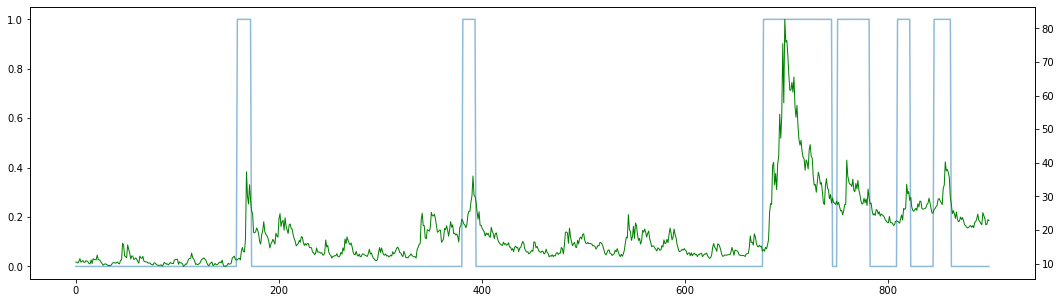

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
lns1 = ax.plot(df_test.vix_pr.reset_index(drop=True), alpha=0.5)
ax2 = ax.twinx()
lns2 = ax2.plot(VIX, linewidth=1, c='g', label='y')
plt.show()

In [98]:
X_test, y_test = df_test.drop(['vix_pr'], 1).reset_index(drop=True), df_test['vix_pr'].reset_index(drop=True)

In [99]:
preds = lr.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, preds)

# fscore = (2 * precision/10 * recall) / (precision/10 + recall)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%.3f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

roc_auc = roc_auc_score(y_true=y_test, y_score=preds)
print(roc_auc)

Best Threshold=0.280, F-Score=0.483, Precision=0.475, Recall=0.490
0.7047132043445835


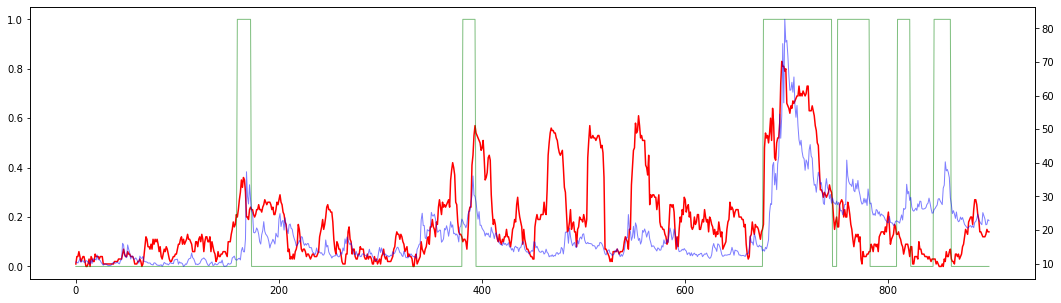

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
lns1 = ax.plot(preds, c='r')
lns2 = ax.plot(df_test.vix_pr.reset_index(drop=True), linewidth=1, c='g', label='y', alpha=0.5)
ax2 = ax.twinx()
lns3 = ax2.plot(VIX, linewidth=1, c='b', label='y', alpha=0.5)
plt.show()

In [101]:
# plt.figure(figsize=(7,7))
# plt.scatter(df['vix_pr'], preds, s=2)
# plt.title('Диаграмма рассеяния')
# plt.xlabel('S&P 500')
# plt.ylabel('казначейские облигации')
# plt.show()
# df['vix_pr'].corr(pd.Series(preds))
